# Combine the dataset from 2018-2021

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import statsmodels.api as sm
from scipy import stats
import geopandas as gpd
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Module1_CDR/2018-2021 Dataset/merged_dataset_18_21.csv')

In [ ]:
df.shape

(301, 554)

<ipython-input-42-3ccaa8279789>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_counts = missing_counts.append({'Column': column, 'Missing_NA_0_Count': count}, ignore_index=True)
<ipython-input-42-3ccaa8279789>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_counts = missing_counts.append({'Column': column, 'Missing_NA_0_Count': count}, ignore_index=True)
<ipython-input-42-3ccaa8279789>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_counts = missing_counts.append({'Column': column, 'Missing_NA_0_Count': count}, ignore_index=True)
<ipython-input-42-3ccaa8279789>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

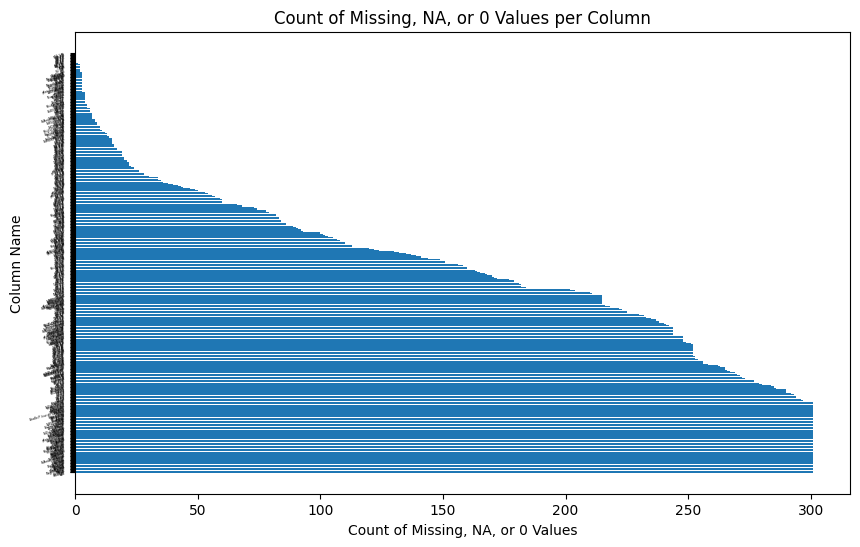

In [ ]:
# Assuming you have a DataFrame named 'df'
# Create a DataFrame to store the counts
missing_counts = pd.DataFrame(columns=['Column', 'Missing_NA_0_Count'])

# Loop through each column in the DataFrame
for column in df.columns:
    # Count the number of missing, NA, or 0 values in the column
    count = df[column].isnull().sum() + (df[column] == 0).sum()

    # Append the results to the missing_counts DataFrame
    missing_counts = missing_counts.append({'Column': column, 'Missing_NA_0_Count': count}, ignore_index=True)

# Sort the DataFrame by the count of missing values
missing_counts = missing_counts.sort_values(by='Missing_NA_0_Count', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(missing_counts['Column'], missing_counts['Missing_NA_0_Count'])
plt.yticks(fontsize=2, rotation=15)
plt.xlabel('Count of Missing, NA, or 0 Values')
plt.ylabel('Column Name')
plt.title('Count of Missing, NA, or 0 Values per Column')
plt.show()


In [ ]:
columns_with_few_missing = df.columns[df.isnull().sum() < 100].tolist()
print(columns_with_few_missing)

['Nom_df2', 'G.1.4.P', 'G.1.5.P', 'G.1.6.P', 'G.1.7.P', 'I.1.16.M', 'A.5.1.F', 'A.7.14.M', 'L.6.4.F', 'KostAWLFA', 'L.5.5.F', 'A.7.1.F', 'D.2.6.P', 'J.1.4.M', 'L.6.8.F', 'J.1.5.M', 'A.7.4.F', 'pPatLKP', 'KostKVGStatA', 'AnlKVGStatA', 'A.7.7.M', 'F.3.7.M', 'D.1.2.M', 'B.1.9.M', 'H.1.5.P', 'I.1.8.M', 'L.5.3.F', 'J.3.1.P', 'H.4.2.P', 'A.7.15.M', 'A.7.18.P', 'B.1.14.P', 'E.4.6.M', 'E.4.16.P', 'H.1.9.P', 'D.1.1.M', 'Akt', 'KostOKPAmbA', 'G.5.3.P', 'A.7.24.F', 'Gebs', 'A.7.28.M', 'AustStatMSA', 'F.3.3.M', 'A.3.2.V', 'F.1.4.F', 'A.7.13.M', 'I.1.9.M', 'G.2.2.F', 'H.1.7.M', 'E.4.2.M', 'StdBelA', 'E.5.4.F', 'H.3.2.F', 'E.3.1.F', 'A.1.14.P', 'L.6.1.F', 'E.4.15.M', 'A.7.11.V', 'I.2.7.M', 'KostAmbA', 'F.3.9.F', 'A.7.8.M', 'A.7.12.V', 'J.1.1.M', 'G.3.5.P', 'H.3.3.F', 'F.1.5.X', 'C.1.5.S', 'F.2.8.M', 'G.6.3.F', 'E.4.11.F', 'B.1.11.M', 'A.7.29.M', 'E.4.1.V', 'BettenStatA', 'A.7.6.F', 'J.1.3.P', 'A.7.27.M', 'G.6.4.F', 'AustStatMST', 'I.1.18.M', 'D.4.5.M', 'G.4.4.M', 'F.2.10.M', 'I.1.19.M', 'I.2.16.F', 

In [ ]:
#df_100 contains only the columns where less than 100 values are na/missing
df_100 = df[columns_with_few_missing]
df_100.shape

(301, 405)

In [ ]:
df_100['G.1.4.P/Deliveries'] = df_100['G.1.4.P']/df_100['G.1.1.F'] #c-sections over inpatient deliveries
df_100['G.1.5.P/Deliveries'] = df_100['G.1.5.P']/df_100['G.1.1.F'] #c-sections in low-risk deliveries over inpatient deliveries
df_100['G.1.6.P/Deliveries'] = df_100['G.1.6.P']/df_100['G.1.1.F'] #c-sections in low-risk deliveries age <35 over inpatient deliveries
df_100['G.1.7.P/Deliveries'] = df_100['G.1.7.P']/df_100['G.1.1.F'] #c-sections in low-risk deliveries age >34 over inpatient deliveries

<ipython-input-45-68b5701a986e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['G.1.4.P/Deliveries'] = df_100['G.1.4.P']/df_100['G.1.1.F'] #c-sections over inpatient deliveries
<ipython-input-45-68b5701a986e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['G.1.5.P/Deliveries'] = df_100['G.1.5.P']/df_100['G.1.1.F'] #c-sections in low-risk deliveries over inpatient deliveries
<ipython-input-45-68b5701a986e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [ ]:
# Assuming you have a DataFrame 'df' and you want to make 'column1', 'column2', 'column3', 'column4', and 'column5' the first columns.
desired_column_order = ['Nom_df2', 'G.1.4.P/Deliveries', 'G.1.5.P/Deliveries', 'G.1.6.P/Deliveries', 'G.1.7.P/Deliveries'] + [col for col in df_100.columns if col not in ['Nom_df2', 'G.1.4.P/Deliveries', 'G.1.5.P/Deliveries', 'G.1.6.P/Deliveries', 'G.1.7.P/Deliveries']]

# Reorder the DataFrame columns
df_100_rates = df_100[desired_column_order]

In [ ]:
df_100_rates

,Nom_df2,G.1.4.P/Deliveries,G.1.5.P/Deliveries,G.1.6.P/Deliveries,G.1.7.P/Deliveries,G.1.4.P,G.1.5.P,G.1.6.P,G.1.7.P,I.1.16.M,...,F.2.13.V,A.1.11.M,KostStatA,K.1.3.F,D.1.11.M,H.4.4.M,I.1.13.M,E.4.16.M,StdBelP,F.3.1.V
0,Andreas Klinik,0.537190,0.446281,0.289256,0.157025,260.0,216.0,140.0,76.0,14.0,...,0.0,7.0,42564667.0,0.0,20.0,2.0,0.0,0.0,4093.87,0.0
1,Bethesda Spital AG,0.361747,0.288226,0.201385,0.086841,679.0,541.0,378.0,163.0,0.0,...,0.0,0.0,55361461.0,1.0,4.0,7.0,0.0,0.0,1657.00,0.0
2,CHUV Centre Hospitalier Universitaire Vaudois,0.279279,0.167754,0.104070,0.063684,899.0,540.0,335.0,205.0,12.0,...,4.0,313.0,696811983.0,8.0,275.0,28.0,0.0,2.0,0.00,21.0
3,Center da Sanda Engiadina Bassa Ospidal d'Engi...,0.253731,0.208955,0.164179,0.044776,17.0,14.0,11.0,3.0,0.0,...,0.0,5.0,12237649.0,0.0,6.0,0.0,0.0,0.0,0.00,0.0
4,Centro Sanitario Valposchiavo Ospedale San Sisto,0.413793,0.275862,0.172414,0.103448,12.0,8.0,5.0,3.0,0.0,...,0.0,5.0,4395777.0,0.0,16.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Stadtspital Triemli,0.372003,0.287671,0.154538,0.133134,869.0,672.0,361.0,311.0,11.0,...,3.0,484.0,309329431.0,1.0,171.0,41.0,0.0,3.0,0.00,10.0
297,Stiftung Spital Muri,0.335303,0.277696,0.189069,0.088626,227.0,188.0,128.0,60.0,4.0,...,0.0,33.0,67280980.0,2.0,109.0,9.0,0.0,0.0,0.00,0.0
298,Universitätsspital Basel,0.370635,0.242208,0.133308,0.108900,987.0,645.0,355.0,290.0,23.0,...,0.0,436.0,657067820.0,13.0,250.0,43.0,7.0,0.0,0.00,14.0
299,Universitätsspital Zürich,0.474082,0.270148,0.143398,0.126750,1253.0,714.0,379.0,335.0,0.0,...,1.0,389.0,839407329.0,30.0,212.0,13.0,0.0,1.0,0.00,15.0


In [ ]:
columns_to_drop = ['G.1.4.P', 'G.1.5.P', 'G.1.6.P', 'G.1.7.P', 'Inst']

# Drop the specified columns from the DataFrame
df_100_rates.drop(columns=columns_to_drop, inplace=True)

<ipython-input-48-a000ebb2bbbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100_rates.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df_100_rates.shape

(301, 404)

In [ ]:
df_100_rates.to_csv('/content/drive/MyDrive/Module1_CDR/2018-2021 Dataset/cleaned_dataset.csv', index=False)

We will still have to decide what to do about all the 0 in our dataset.. Are they actual 0 or were they not collected?

<ipython-input-51-779610a2aa69>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  zero_counts = zero_counts.append({'Column': column, 'Count of Zeros': count_zeros}, ignore_index=True)
<ipython-input-51-779610a2aa69>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  zero_counts = zero_counts.append({'Column': column, 'Count of Zeros': count_zeros}, ignore_index=True)
<ipython-input-51-779610a2aa69>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  zero_counts = zero_counts.append({'Column': column, 'Count of Zeros': count_zeros}, ignore_index=True)
<ipython-input-51-779610a2aa69>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  zero_counts

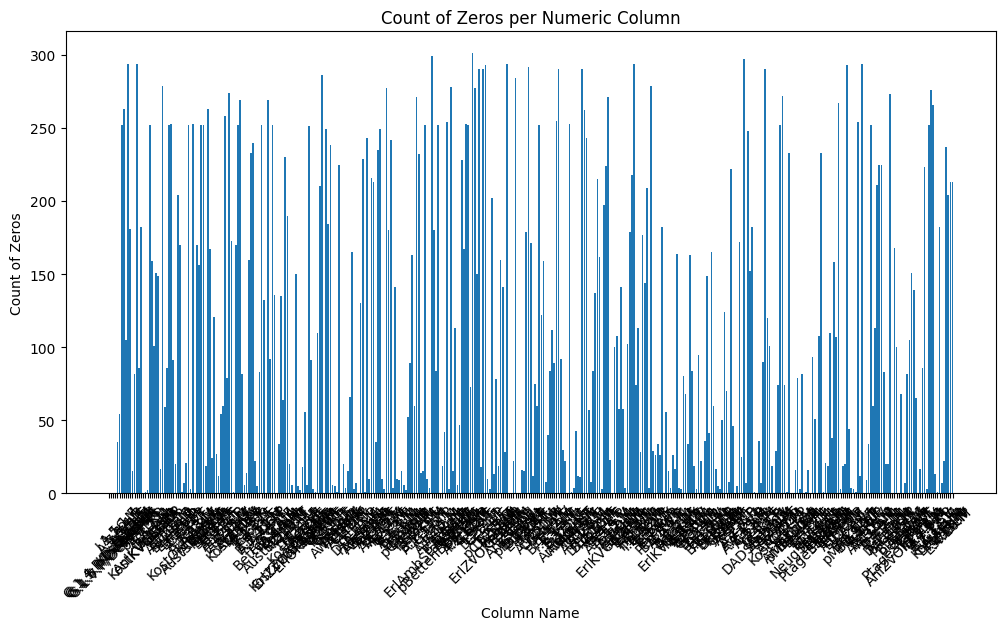

In [ ]:
# Assuming you have a DataFrame named 'df'
# Create a DataFrame to store the counts of 0 values
zero_counts = pd.DataFrame(columns=['Column', 'Count of Zeros'])

# Loop through each column in the DataFrame
for column in df_100_rates.columns:
    if df_100_rates[column].dtype in [int, float]:
        count_zeros = (df_100_rates[column] == 0).sum()
        zero_counts = zero_counts.append({'Column': column, 'Count of Zeros': count_zeros}, ignore_index=True)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(zero_counts['Column'], zero_counts['Count of Zeros'])
plt.xlabel('Column Name')
plt.ylabel('Count of Zeros')
plt.title('Count of Zeros per Numeric Column')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


Here we see how many of the 301 datapoints are below the 15% c-section rate defined by the WHO

--> i checked and if we want equal numbers of high and low c-sections we would need to look at 32% as cut-off (this is based on the overall c-section rate (G.1.4.P), not the c-section rate in low-risk deliveries)

In [ ]:
columns_to_check = ['G.1.4.P/Deliveries', 'G.1.5.P/Deliveries', 'G.1.6.P/Deliveries', 'G.1.7.P/Deliveries']

# Count rows where values are > 0.15
count_gt_0_15 = df_100_rates[columns_to_check] > 0.32
count_gt_0_15 = count_gt_0_15.sum()


# Count rows where values are >= 0.15
count_smleql_0_15 = df_100_rates[columns_to_check] <= 0.32
count_smleql_15 = count_smleql_0_15.sum()

print('number of rows where rates are >0.32:\n',count_gt_0_15, 'and number of rows where rates are =<0.32:\n', count_smleql_15)

number of rows where rates are >0.15:
 G.1.4.P/Deliveries    153
G.1.5.P/Deliveries     42
G.1.6.P/Deliveries      1
G.1.7.P/Deliveries      0
dtype: int64 and number of rows where rates are =<0.15:
 G.1.4.P/Deliveries    148
G.1.5.P/Deliveries    259
G.1.6.P/Deliveries    300
G.1.7.P/Deliveries    301
dtype: int64
